In [1]:
import matplotlib.pyplot as plt
import numpy as np

from HARK.Calibration.life_tables.us_ssa.SSATools import (
    get_ssa_life_tables,
    parse_ssa_life_table,
)

In [2]:
tables = get_ssa_life_tables()
print(tables.head)

<bound method NDFrame.head of       Year    x      q(x)    l(x)   d(x)   L(x)     T(x)   e(x)    D(x)  \
0     1900    0  0.145957  100000  14596  90026  4640593  46.41  100000   
1     1900    1  0.038140   85404   3257  83776  4550567  53.28   83484   
2     1900    2  0.019577   82147   1608  81343  4466791  54.38   78495   
3     1900    3  0.013529   80539   1090  79994  4385448  54.45   75228   
4     1900    4  0.010797   79449    858  79020  4305454  54.19   72542   
...    ...  ...       ...     ...    ...    ...      ...    ...     ...   
9355  2095  115  0.498121      25     12     18       35   1.42       2   
9356  2095  116  0.523027      12      6      9       17   1.34       1   
9357  2095  117  0.549179       6      3      4        7   1.26       0   
9358  2095  118  0.576638       3      2      2        3   1.18       0   
9359  2095  119  0.605470       1      1      1        1   1.11       0   

       M(x)    A(x)     N(x)     a(x)  12a(x) Sex      Method  
0    

In [3]:
# We will find 1-year survival probabilities from ages 21 to 100
min_age = 21
max_age = 100
ages = np.arange(min_age, max_age + 1)

# In the years 1900 and 1950
years = [1900, 1950]

Text(0.5, 1.0, 'Longitudinal survival probabilities')

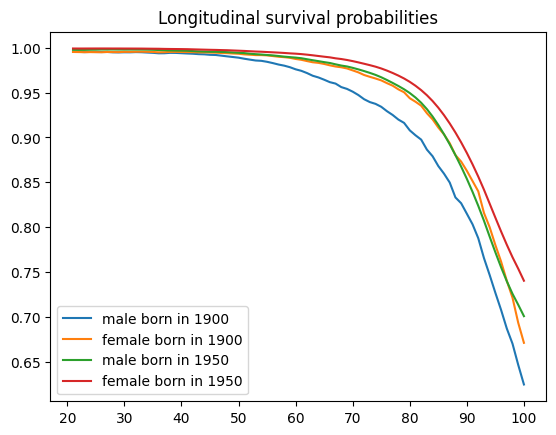

In [4]:
# First, the "longitudinal method", which gives us the probabilities
# experienced by agents born in "year" throughout their lived
plt.figure()
for cohort in years:
    for s in ["male", "female"]:
        fem = s == "female"
        LivPrb = parse_ssa_life_table(
            female=fem,
            cohort=cohort,
            min_age=min_age,
            max_age=max_age,
        )

        plt.plot(ages, LivPrb, label=s + " born in " + str(cohort))

plt.legend()
plt.title("Longitudinal survival probabilities")

Text(0.5, 1.0, 'Cross-sectional survival probabilities')

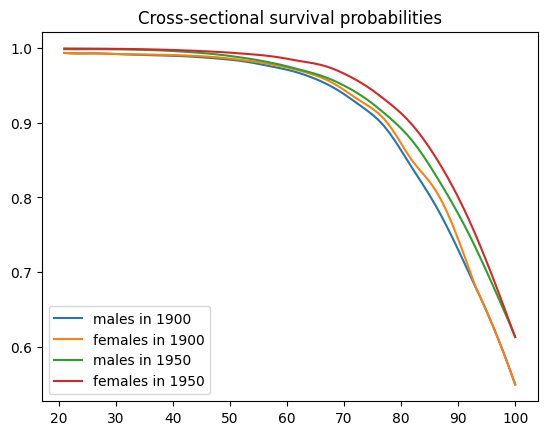

In [5]:
# Second, the "cross-sectional method", which gives us the probabilities of
# survivals of individuals of differnet ages that are alive in the given year.
plt.figure()
for year in years:
    for s in ["male", "female"]:
        fem = s == "female"
        LivPrb = parse_ssa_life_table(
            female=fem,
            year=year,
            cross_sec=True,
            min_age=min_age,
            max_age=max_age,
        )

        plt.plot(ages, LivPrb, label=s + "s in " + str(year))

plt.legend()
plt.title("Cross-sectional survival probabilities")